# A. Равенство подстрок

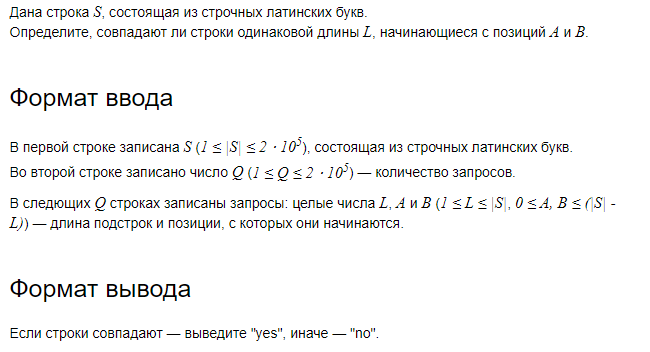

In [1]:
s = 'acabaca'
q = 3
lab_str = '''\
4 3 2
3 4 0
2 0 1'''.split('\n')

l_str = [0] * q
a_poz = [0] * q
b_poz = [0] * q

for i in range(q):
    l_str[i], a_poz[i], b_poz[i] = map(int, (lab_str[i].split()))


In [2]:
def is_equal(from_1, from_2, len_str):
    answer  = [False] * len(x)
    for i in range(len(x)):
        answer[i] = (h[i][from_1 + len_str - 1] + h[i][from_2 - 1] * x_pow[i][len_str]) % p[i] == \
                    (h[i][from_2 + len_str - 1] + h[i][from_1 - 1] * x_pow[i][len_str]) % p[i]         
    return all(answer)

def h_func(s, x, p):
    h = [[0] * (n + 1) for i in range(len(x))]
    x_pow = [[1] * (n + 1) for i in range(len(x))]
    for i in range(len(x)):
        for ind_str in range(1, (n + 1)):
            h[i][ind_str] = (h[i][ind_str - 1] * x[i] + ord(s[ind_str])) % p[i] 
            x_pow[i][ind_str] = (x_pow[i][ind_str - 1] * x[i]) % p[i]
    return h, x_pow
s = input()
q = int(input())
l_str = [0] * q
a_poz = [0] * q
b_poz = [0] * q
for i in range(q):
    l_str[i], a_poz[i], b_poz[i] = map(int, input().split())

# создадим массив, для проверки по нескольким значениям 'x' и 'p'
p = [2569995]
x = [257]

n = len(s)
s = ' ' + s
h, x_pow = h_func(s, x, p)

answer = [False] * q
for query in range(q):
    answer[query] = is_equal(a_poz[query] + 1, b_poz[query] + 1, l_str[query] )
    
answer = ['yes' if i else 'no' for i in answer]
print(*answer, sep='\n')

acabaca
3
0 0 2
0 0 3
1 0 1
yes
yes
no


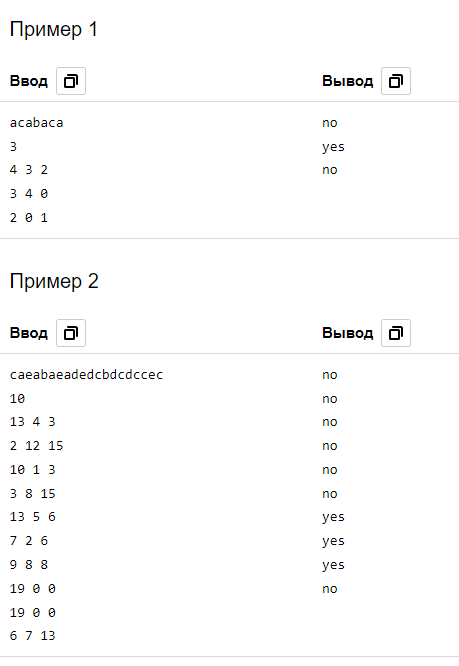

# B. Основание строки
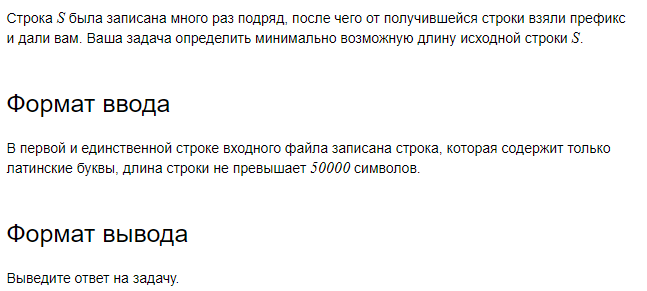

In [123]:
def is_equal(from_1, from_2, len_str):
    answer  = [False] * len(x)
    for i in range(len(x)):
        answer[i] = (h[i][from_1 + len_str - 1] + h[i][from_2 - 1] * x_pow[i][len_str]) % p[i] == \
                    (h[i][from_2 + len_str - 1] + h[i][from_1 - 1] * x_pow[i][len_str]) % p[i]         
    return all(answer)

def h_func(s, x, p):
    h = [[0] * (n + 1) for i in range(len(x))]
    x_pow = [[1] * (n + 1) for i in range(len(x))]
    for i in range(len(x)):
        for ind_str in range(1, (n + 1)):
            h[i][ind_str] = (h[i][ind_str - 1] * x[i] + ord(s[ind_str])) % p[i] 
            x_pow[i][ind_str] = (x_pow[i][ind_str - 1] * x[i]) % p[i]
    return h, x_pow
s = input()
# s = 'bcabcab'
# s ='z1z2z7'
# s = 'zzz'
# создадим массив, для проверки по нескольким значениям 'x' и 'p'
p = [2569995]
x = [257]

n = len(s)
s = ' ' + s
h, x_pow = h_func(s, x, p)
k = 0
for k in range(2, n + 2):
    if  is_equal(1, k, n - k + 1):
        break
print(k - 1)


zzz
1


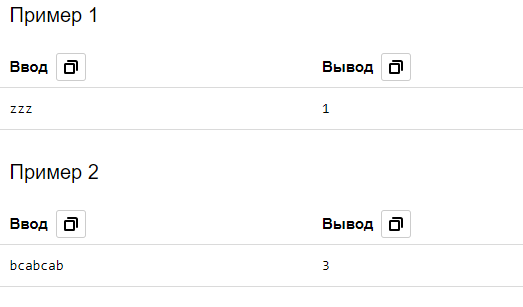

# C. Z-функция
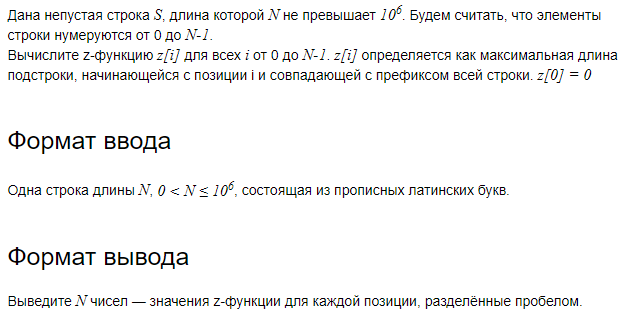

### Не укладывается по времени выполнения 

In [7]:
def is_equal(from_1, from_2, len_str):
    return  (h[from_1 + len_str - 1] + h[from_2 - 1] * x_pow[len_str]) % p == \
                    (h[from_2 + len_str - 1] + h[from_1 - 1] * x_pow[len_str]) % p       
     

def h_func(s, x, p):
    h = [0] * (n + 1)
    x_pow = [1] * (n + 1)
    for ind_str in range(1, (n + 1)):
        h[ind_str] = (h[ind_str - 1] * x + ord(s[ind_str])) % p 
        x_pow[ind_str] = (x_pow[ind_str - 1] * x) % p
    return h, x_pow


s = input()
# s = 'abracadabra'
# s = 'abcabc'
# s = 'bcabcab'
# s ='z1z2z7'
# s = 'zzz'

# создадим массив, для проверки по нескольким значениям 'x' и 'p'
p = 10**9 + 7
x = 257

n = len(s)
s = ' ' + s
h, x_pow = h_func(s, x, p)
k = 0
z_func_list = [0] * (n)
for i in range(1, n):
    flag = False
    for k in range(0, n - i + 1):
        if not is_equal(1, i + 1, k):
            flag = True
            break
    z_func_list[i] = k - 1 if flag else k 
print(*z_func_list)


0 0 0 1 0 1 0 4 0 0 1


### + Бинарный поиск. 
### С массивом 'p' и 'x', не прошли тесты по времени выполнения, если их убрать все работает

In [57]:
def is_equal(from_1, from_2, len_str):
    answer  = [False] * len(x)
    for i in range(len(x)):
        answer[i] = (h[i][from_1 + len_str - 1] + h[i][from_2 - 1] * x_pow[i][len_str]) % p[i] == \
                    (h[i][from_2 + len_str - 1] + h[i][from_1 - 1] * x_pow[i][len_str]) % p[i]         
    return all(answer)

def h_func(s, x, p):
    h = [[0] * (n + 1) for i in range(len(x))]
    x_pow = [[1] * (n + 1) for i in range(len(x))]
    for i in range(len(x)):
        for ind_str in range(1, (n + 1)):
            h[i][ind_str] = (h[i][ind_str - 1] * x[i] + ord(s[ind_str])) % p[i] 
            x_pow[i][ind_str] = (x_pow[i][ind_str - 1] * x[i]) % p[i]
    return h, x_pow
s = input()
# s = 'abracadabra'
# s = 'abcabc'
# s = 'bcabcab'
# s ='z1z2z7'
# s = 'zzz'
# создадим массив, для проверки по нескольким значениям 'x' и 'p'
p = [10**9 + 7]
x = [257]

n = len(s)
s = ' ' + s
h, x_pow = h_func(s, x, p)
k = 0
z_func_list = [0] * (n)
for i in range(1, n):
    l_ind = 0
    r_ind = n - i 
    while l_ind < r_ind :
        len_ = (r_ind - l_ind + 1) // 2
        if is_equal(1, i + 1, l_ind + len_):
            l_ind += len_

        else:
            r_ind -= len_ 
        if len_ == 0 :
            break
    z_func_list[i] = r_ind
    
print(*z_func_list)



0 0 0 3 0 0


###  Аналогично предыдущему решению, различия в 'p' и 'x' - они представлены числами +  по этой причине изменены функции is_equal и h_func

In [5]:
def is_equal(from_1, from_2, len_str):
    return  (h[from_1 + len_str - 1] + h[from_2 - 1] * x_pow[len_str]) % p == \
                    (h[from_2 + len_str - 1] + h[from_1 - 1] * x_pow[len_str]) % p       
     

def h_func(s, x, p):
    h = [0] * (n + 1)
    x_pow = [1] * (n + 1)
    for ind_str in range(1, (n + 1)):
        h[ind_str] = (h[ind_str - 1] * x + ord(s[ind_str])) % p 
        x_pow[ind_str] = (x_pow[ind_str - 1] * x) % p
    return h, x_pow
s = input()
# s = 'abracadabra'
# создадим массив, для проверки по нескольким значениям 'x' и 'p'
p = 10**9 + 7
x = 257

n = len(s)
s = ' ' + s
h, x_pow = h_func(s, x, p)
z_func_list = [0] * (n)
for i in range(1, n):
    l_ind = 0
    r_ind = n - i 
    while l_ind < r_ind :
        len_ = (r_ind - l_ind + 1) // 2
        if is_equal(1, i + 1, l_ind + len_):
            l_ind += len_
        else:
            r_ind -= len_ 
        if len_ == 0 :
            break
    z_func_list[i] = r_ind
    
print(*z_func_list)

0 0 0 1 0 1 0 4 0 0 1


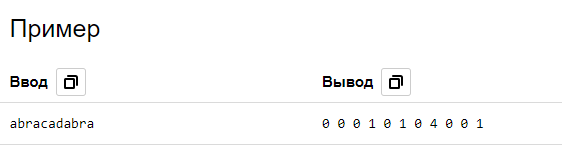

# D. Кубики в зеркале
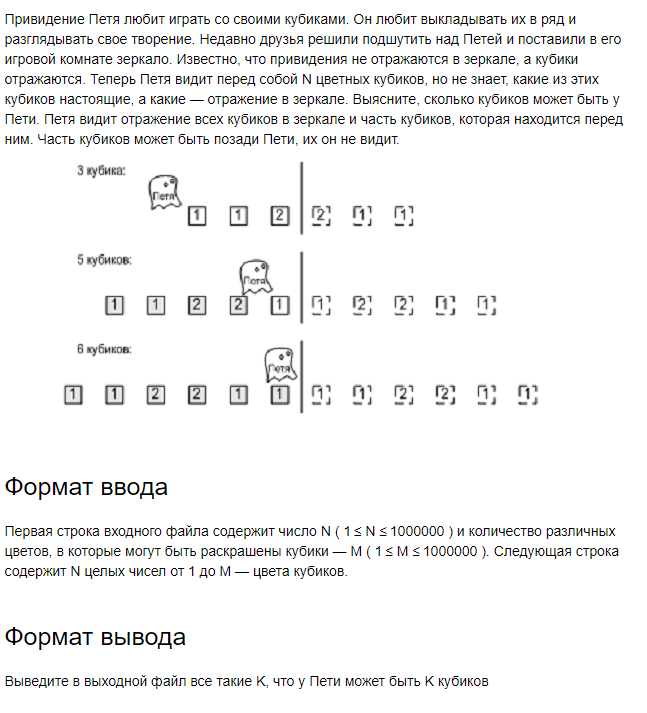

In [8]:
def is_rev(from_ind):
    return  (h[2 * from_ind ] + h_rev[from_ind] * x_pow[from_ind]) % p == \
            (h_rev[0] + h[from_ind] * x_pow[from_ind]) % p

def h_func(s, x, p, n):
    h = [0] * (n + 1)
    h_rev = [0] * (n + 1)
    x_pow = [1] * (n + 1)
    for ind_str in range(1, n + 1):
        h[ind_str] = (h[ind_str - 1] * x + s[ind_str - 1]) % p 
        h_rev[n - ind_str] = (h_rev[n - ind_str + 1] * x + s[n - ind_str]) % p 
        x_pow[ind_str] = (x_pow[ind_str - 1] * x) % p
    return h, h_rev, x_pow              

# s = [1, 1, 2, 2, 1, 1]
# s = [1, 2, 3, 3, 2, 1,  7]
# s = [1, 2, 3, 4, 5, 6, 7]
# s = [2, 1, 2, 2, 2, 1, 2, 1, 1, 1]
# n, m = 6, 2

n, m = map(int, input().split())
s = list(map( int, input().split()))
x = m + 1
p = 10**9 + 7

h, h_rev, x_pow = h_func(s, x, p, n)
z_func_list = [n]
for i in range(1, (n + 2) // 2):
    if is_rev(i):
        z_func_list.append(n - i )

print(*z_func_list[::-1])

6 2
1 1 2 2 1 1
3 5 6


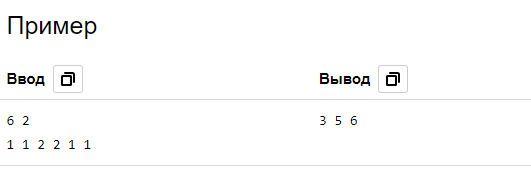

# E. Подпалиндромы
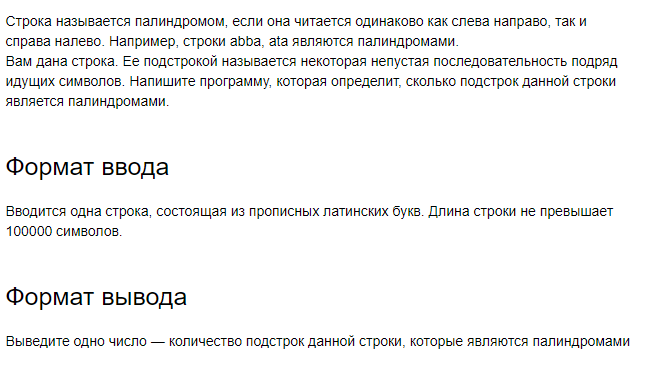

##  44 TL

In [4]:
def is_rev(from_ind, len_):
    a = h[from_ind]
    b = h_rev[from_ind]
    c = x_pow[len_]
    d = h_rev[from_ind - len_]
    e = h[from_ind - len_]
    return  (a + b * c) % p == \
            (d + e * c) % p

def h_func(s, x, p, n):
    h = [0] * (n + 1)
    h_rev = [0] * (n + 1)
    x_pow = [1] * (n + 1)
    for ind_str in range(1, n + 1):
        h[ind_str] = (h[ind_str - 1] * x + ord(s[ind_str - 1])) % p 
        h_rev[n - ind_str] = (h_rev[n - ind_str + 1] * x + ord(s[n - ind_str])) % p 
        x_pow[ind_str] = (x_pow[ind_str - 1] * x) % p
    return h, h_rev, x_pow              

# s = [1, 1, 2, 2, 1, 1]
# s = [1, 2, 3, 3, 2, 1,  7]
# s = [1, 2, 3, 4, 5, 6, 7]

# s = [2, 2, 2]
# s = [1, 2, 2, 1, 1, 4]
# s = '1, 2, 2, 1, 1, 4'.split(', ')
s = input()
n = len(s)
x = 257
p = 10**9 + 7
h, h_rev, x_pow = h_func(s, x, p, n)
# print(f' h = {h}, \n h_rev = {h_rev}, \n\n x = {x_pow}\n')
answer = n
for i in range(2, n + 1):
#     print(i)
    for len_ in range(2, i + 1):
#         print(f'i = {i}, len_ = {len_}, str = {s[i - len_:i]}')
        flag = is_rev(i, len_)
#         print(f'flag = {flag}\n')
        if flag:
            answer +=1
#             print(f'i = {i}, len_ = {len_}, str = {s[i - len_:i]}')
#             print(f' answer = {answer}\n')

print(answer)

babbbabaaa
21


# Этот вариант проходит проверки

In [6]:
def is_rev(from_ind, len_):
    a = h[from_ind + len_ - 1]
    e = h[from_ind - 1]
    c = x_pow[len_ ]
    
    d = h_rev[from_ind - len_ + 1]
    b = h_rev[from_ind + 1]
    
    f = x_pow[len_ ]
    return  (a + b * f) % p == \
            (d + e * c) % p


def h_func(s, x, p, k):
    '''k = len(s) * 2'''
    n = k + 1
    h = [0] * n
    h_rev = [0] * n
    x_pow = [1] * n
    for ind_str in range(1, n):
        s_hash , s_hash_rev = (0 , 0) if ind_str % 2 == 0 else (ord(s[ind_str // 2 ]), ord(s[(k- ind_str) // 2]))
        h[ind_str] = (h[ind_str - 1] * x + s_hash ) % p 
        h_rev[n-ind_str - 1] = (h_rev[n - ind_str] * x + s_hash_rev) % p 
        x_pow[ind_str] = (x_pow[ind_str - 1] * x) % p
    h_rev[0] = (h_rev[1] * x) % p 
    return h, h_rev, x_pow  


s = input()
# s = 'abracadabra'
# s = [1, 1, 2, 2, 1, 1]
# s = [1, 2, 3, 3, 2, 1,  7]
# s = [1, 2, 3, 4, 5, 6, 7]

# s = [2, 3, 2]
# s = [2, 2, 2]
# # s = [2, 3, 2, 1]
# s = [2, 1, 2, 2, 2, 1, 2, 1, 1, 1]
# s = 'babbbabaaa'
# s = [1, 2, 2, 1, 1, 4]
# s = '1, 1, 2, 2, 1, 1'.split(', ')
# s = 'aaa'


p = 10**9 + 7
x = 257

n = len(s) * 2
h, h_rev, x_pow = h_func(s, x, p, n)
# print(f' h = {h}, \n h_rev = {h_rev}, \n\n x = {x_pow}\n')
answer = 0 
s_new = [0 if (i % 2 == 0) else s[i // 2]for i in range(n)]    

for i in range(1, n ):
    l_ind = -1
    r_ind = min(i + 1, n - i + 1)
    while l_ind < r_ind:
        len_ = (r_ind - l_ind + 1) // 2
        flag = is_rev(i,  l_ind + len_)
        if flag:
            l_ind += len_
        else:
            r_ind -= len_
    answer += r_ind // 2
    
print(answer)

babbbabaaa
21


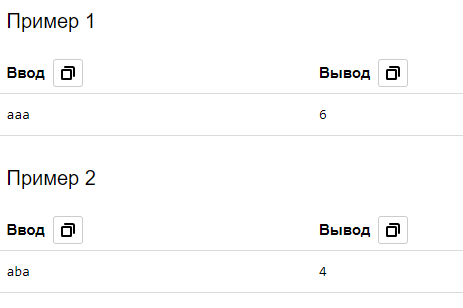